Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading csv file 
bank=pd.read_csv(r"C:\Users\Siddhant Sonawane\Downloads\bank-full.csv",delimiter=';')

In [3]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# check null values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
#check duplicates
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [8]:
#one-hot-encoding for categorical variable
bank_1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome'])
bank_1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [9]:
#To display all columns
pd.set_option('display.max.columns',None)
bank_1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [10]:
bank_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_admin.           45211 non-null  uint8 
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

In [11]:
# Custom Binary Encoding of Binary o/p variables 
bank_1['default'] = np.where(bank_1['default'].str.contains("yes"), 1, 0)
bank_1['housing'] = np.where(bank_1['housing'].str.contains("yes"), 1, 0)
bank_1['loan'] = np.where(bank_1['loan'].str.contains("yes"), 1, 0)
bank_1['y'] = np.where(bank_1['y'].str.contains("yes"), 1, 0)
bank_1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [12]:
#Encoding for month categorical 
bank_1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [13]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

bank_1=bank_1.replace(order)
bank_1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1


In [14]:
bank_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int32
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

In [15]:
bank_1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [16]:
bank_1[['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown']] = bank_1[['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown']].astype('int64')

In [17]:
bank_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int64
 12  job_admin.           45211 non-null  int64
 13  job_blue-collar      45211 non-null  int64
 14  job_entrepreneur     45211 non-null  int64
 15  job_housemaid        45211 non-null  int64
 16  job_management       4

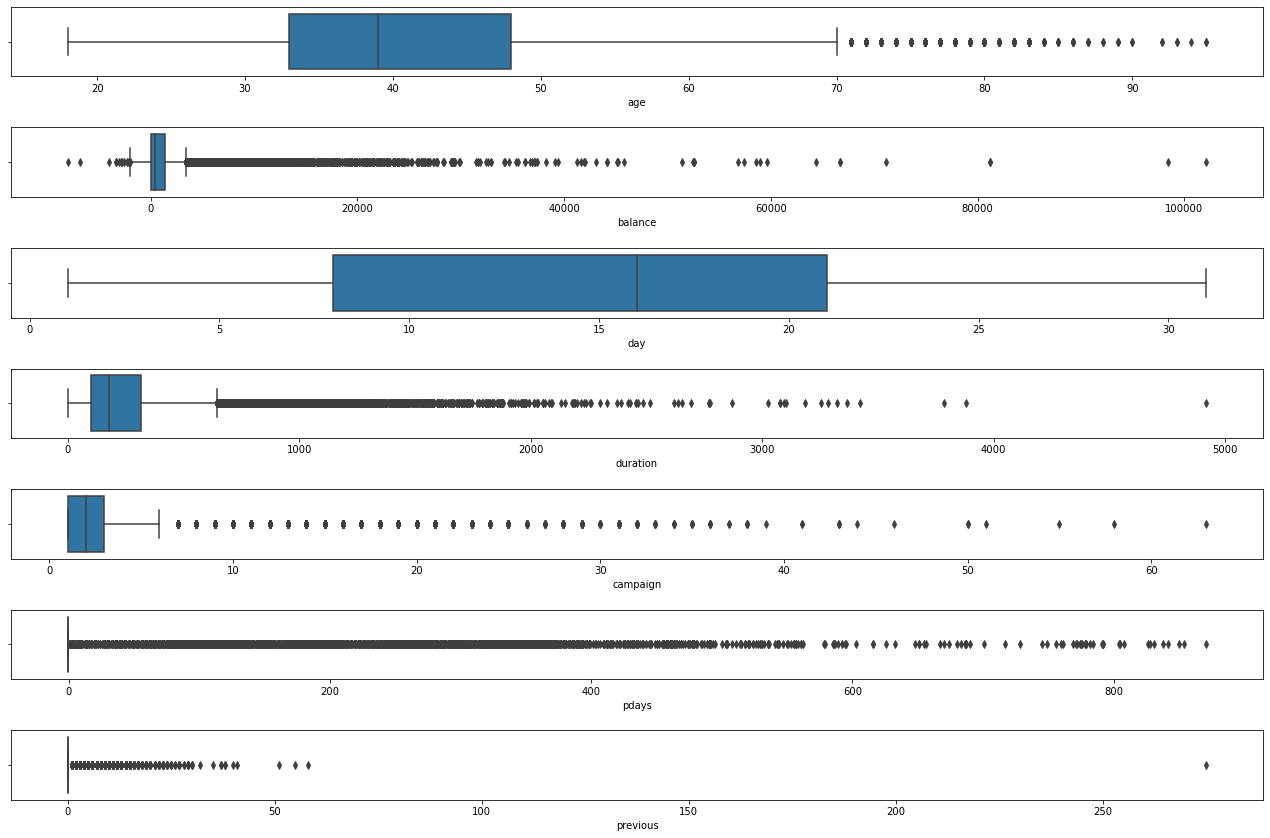

In [18]:
#check for outliers for numerical data
b=bank.copy()
fig, axes=plt.subplots(7,1,figsize=(18,12),sharex=False,sharey=False)
sns.boxplot(x='age',data=b,ax=axes[0])
sns.boxplot(x='balance',data=b,ax=axes[1])
sns.boxplot(x='day',data=b,ax=axes[2])
sns.boxplot(x='duration',data=b,ax=axes[3])
sns.boxplot(x='campaign',data=b,ax=axes[4])
sns.boxplot(x='pdays',data=b,ax=axes[5])
sns.boxplot(x='previous',data=b,ax=axes[6])
plt.tight_layout(pad=2.0)

There are lot of outliers present in the data but we can't drop them because they are present in a very large quantity and can be important for model building

In [19]:
#check for correlation 
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


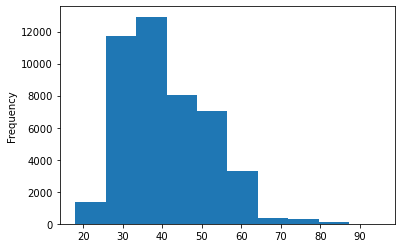

In [20]:
#visualization
#age
bank['age'].plot(kind='hist');

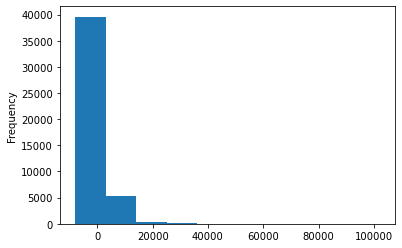

In [21]:
#balance
bank['balance'].plot(kind='hist');

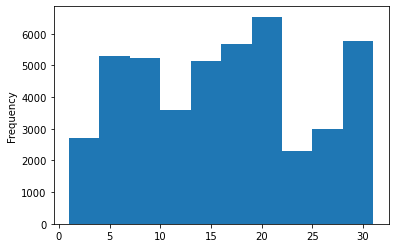

In [22]:
#day
bank['day'].plot(kind='hist');

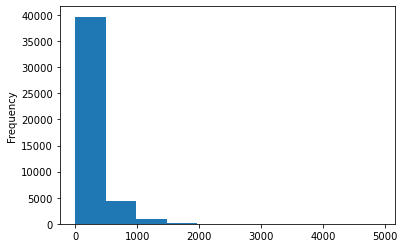

In [23]:
#duration
bank['duration'].plot(kind='hist');

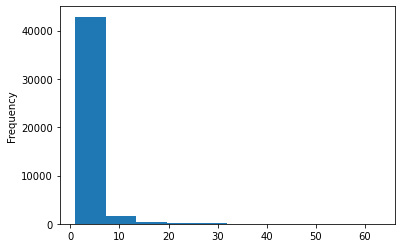

In [24]:
#campaign
bank['campaign'].plot(kind='hist');

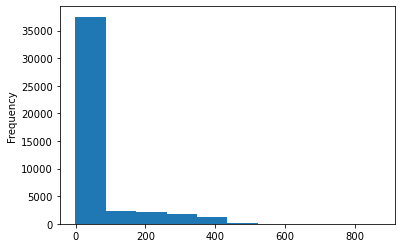

In [25]:
#pdays
bank['pdays'].plot(kind='hist');

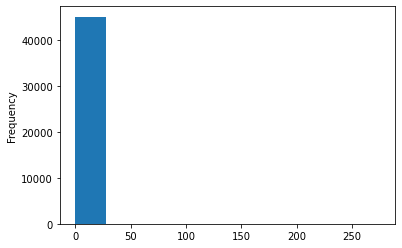

In [26]:
#previous
bank['previous'].plot(kind='hist');

Visualizing Deposite with respect to numerical input variable

In [27]:
#Balance with respect to deposite

df_a=pd.DataFrame()
df_a['balance_yes']=(bank[bank['y']=='yes'][['y','balance']].describe())['balance']
df_a['balance_no']=(bank[bank['y']=='no'][['y','balance']].describe())['balance']
df_a

,balance_yes,balance_no
count,5289.000000,39922.000000
mean,1804.267915,1303.714969
std,3501.104777,2974.195473
min,-3058.000000,-8019.000000
25%,210.000000,58.000000
50%,733.000000,417.000000
75%,2159.000000,1345.000000
max,81204.000000,102127.000000


<AxesSubplot:title={'center':'Balance and term deposite stats'}>

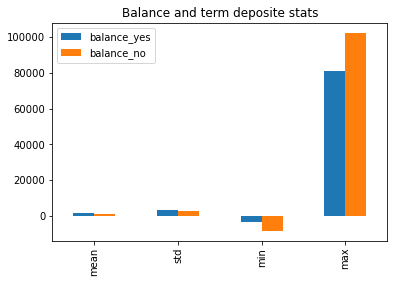

In [28]:
df_a.drop(['count','25%','50%','75%']).plot.bar(title='Balance and term deposite stats')

In [29]:
# age with respect to deposite

df_b=pd.DataFrame()
df_b['age_yes']=(bank[bank['y']=='yes'][['y','age']].describe())['age']
df_b['age_no']=(bank[bank['y']=='no'][['y','age']].describe())['age']
df_b

,age_yes,age_no
count,5289.000000,39922.000000
mean,41.670070,40.838986
std,13.497781,10.172662
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,95.000000


<AxesSubplot:title={'center':'Age and term deposite stats'}>

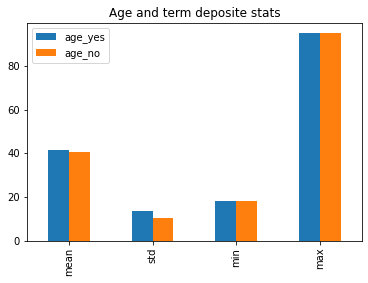

In [30]:
df_b.drop(['count','25%','50%','75%']).plot.bar(title='Age and term deposite stats')

In [31]:
#campaign with respect to term deposite 

df_c=pd.DataFrame()
df_c['campaign_yes']=(bank[bank['y']=='yes'][['y','campaign']].describe())['campaign']
df_c['campaign_no']=(bank[bank['y']=='no'][['y','campaign']].describe())['campaign']
df_c

,campaign_yes,campaign_no
count,5289.000000,39922.000000
mean,2.141047,2.846350
std,1.921826,3.212767
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot:title={'center':'Number of contacts performed during this campaign and deposit statistics'}>

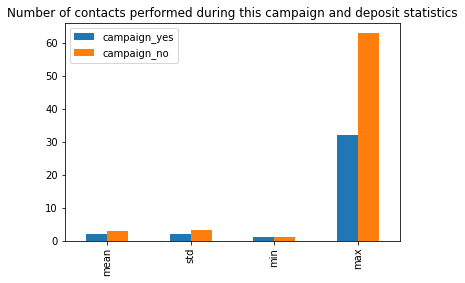

In [32]:
df_c.drop(['count','25%','50%','75%']).plot.bar(title='Number of contacts performed during this campaign and deposit statistics')

In [33]:
#previous with respect to term deposite 

df_d=pd.DataFrame()
df_d['previous_yes']=(bank[bank['y']=='yes'][['y','previous']].describe())['previous']
df_d['previous_no']=(bank[bank['y']=='no'][['y','previous']].describe())['previous']
df_d

,previous_yes,previous_no
count,5289.000000,39922.000000
mean,1.170354,0.502154
std,2.553272,2.256771
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,58.000000,275.000000


<AxesSubplot:title={'center':'Previous no contact performed during this compaign'}>

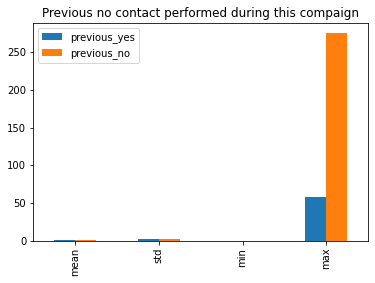

In [34]:
df_d.drop(['count','25%','50%','75%']).plot.bar(title='Previous no contact performed during this compaign')

From the above plots we can infer that People who subscribed for term deposit tend to have greater balance and age values. People who subscribed for term deposit tend to have fewer number of contacts during this campaign.

Visualizing Term Deposite with respect to input categorical variable

<AxesSubplot:title={'center':'Job and Deposite '}>

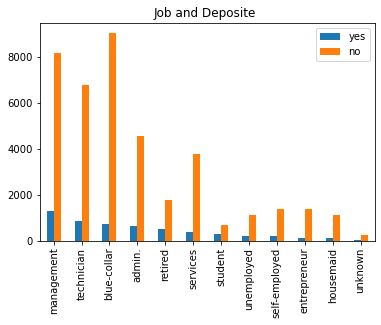

In [35]:
#jobs with respect to deposite
df_f=pd.DataFrame()
df_f['yes']=bank[bank['y']=='yes']['job'].value_counts()
df_f['no']=bank[bank['y']=='no']['job'].value_counts()
df_f.plot.bar(title='Job and Deposite ')

<AxesSubplot:title={'center':'Marital status and deposit'}>

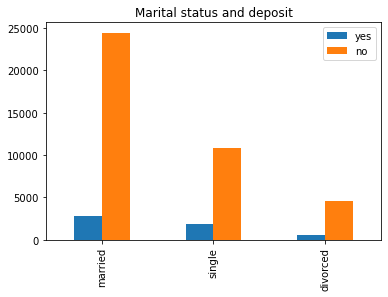

In [36]:
#marital status and deposit
df_g = pd.DataFrame()

df_g['yes'] = bank[bank['y'] == 'yes']['marital'].value_counts()
df_g['no'] = bank[bank['y'] == 'no']['marital'].value_counts()

df_g.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

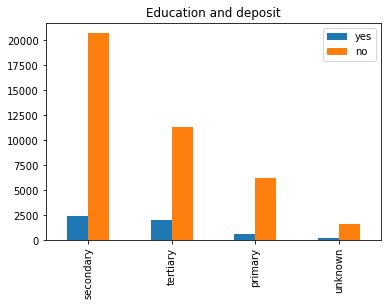

In [37]:
#education and deposit
df_h = pd.DataFrame()

df_h['yes'] = bank[bank['y'] == 'yes']['education'].value_counts()
df_h['no'] = bank[bank['y'] == 'no']['education'].value_counts()

df_h.plot.bar(title = 'Education and deposit')

<AxesSubplot:title={'center':'Types of contacts and deposite'}>

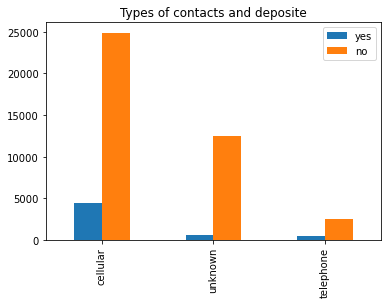

In [38]:
#types of contacts and deposite
df_i=pd.DataFrame()
df_i['yes']=bank[bank['y']=='yes']['contact'].value_counts()
df_i['no']=bank[bank['y']=='no']['contact'].value_counts()
df_i.plot.bar(title='Types of contacts and deposite')

<AxesSubplot:title={'center':'Outcome of the previous marketing campaign '}>

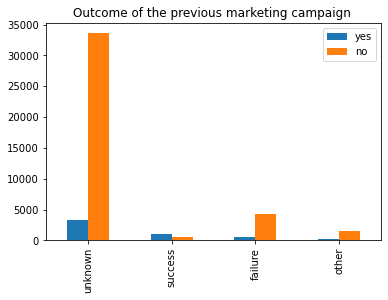

In [39]:
#poutcome with respect to deposit
df_k=pd.DataFrame()
df_k['yes']=bank[bank['y']=='yes']['poutcome'].value_counts()
df_k['no']=bank[bank['y']=='no']['poutcome'].value_counts()
df_k.plot.bar(title='Outcome of the previous marketing campaign ')

<AxesSubplot:title={'center':'Loan and Deposite'}>

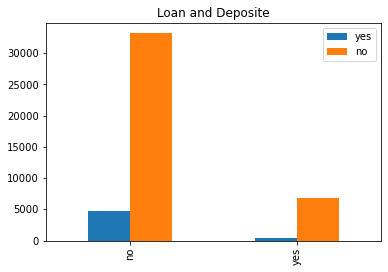

In [40]:
#loan with respect to deposite
df_l=pd.DataFrame()
df_l['yes']=bank[bank['y']=='yes']['loan'].value_counts()
df_l['no']=bank[bank['y']=='no']['loan'].value_counts()
df_l.plot.bar(title='Loan and Deposite')

Subcription rate age

In [41]:
age_response_pct = pd.crosstab(bank_1['y'],bank_1['age']).apply(lambda x: x/x.sum() * 100)
age_response_pct

age,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,92,93,94,95
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,41.666667,68.571429,70.0,72.151899,68.992248,78.217822,77.483444,78.557875,83.354037,84.488449,84.393064,85.56962,87.649402,89.679359,89.40048,89.350913,89.740933,88.965153,89.202658,89.976415,90.177353,90.383322,91.439114,90.70488,91.062802,91.128338,91.81338,91.282895,89.957447,89.613971,91.775326,89.839034,92.332268,91.773504,90.669594,90.460157,89.642417,90.57072,91.25964,90.57971,90.27027,88.571429,83.557047,61.22449,51.25,61.038961,52.702703,64.40678,61.904762,57.407407,41.666667,61.363636,74.626866,53.703704,53.846154,45.454545,64.864865,61.538462,50.0,50.0,53.333333,60.0,61.290323,64.705882,57.894737,72.727273,44.444444,20.0,55.555556,25.0,100.0,100.0,0.0,0.0,0.0,100.0,50.0
1,58.333333,31.428571,30.0,27.848101,31.007752,21.782178,22.516556,21.442125,16.645963,15.511551,15.606936,14.43038,12.350598,10.320641,10.59952,10.649087,10.259067,11.034847,10.797342,10.023585,9.822647,9.616678,8.560886,9.29512,8.937198,8.871662,8.18662,8.717105,10.042553,10.386029,8.224674,10.160966,7.667732,8.226496,9.330406,9.539843,10.357583,9.42928,8.74036,9.42029,9.72973,11.428571,16.442953,38.77551,48.75,38.961039,47.297297,35.59322,38.095238,42.592593,58.333333,38.636364,25.373134,46.296296,46.153846,54.545455,35.135135,38.461538,50.0,50.0,46.666667,40.0,38.709677,35.294118,42.105263,27.272727,55.555556,80.0,44.444444,75.0,0.0,0.0,100.0,100.0,100.0,0.0,50.0


In [42]:
#Subcription rate by job

job_response_pct = pd.crosstab(bank['y'],bank['job']).apply(lambda x: x/x.sum() * 100)
job_response_pct

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


In [43]:
#Subcription rate by marital

marital_response_pct = pd.crosstab(bank['y'],bank['marital']).apply(lambda x: x/x.sum() * 100)
marital_response_pct

marital,divorced,married,single
y,,,
no,88.054542,89.876534,85.050821
yes,11.945458,10.123466,14.949179


In [44]:
#Subcription rate by education

education_response_pct = pd.crosstab(bank['y'],bank['education']).apply(lambda x: x/x.sum() * 100)
education_response_pct

education,primary,secondary,tertiary,unknown
y,,,,
no,91.373522,89.440565,84.99361,86.429725
yes,8.626478,10.559435,15.00639,13.570275


In [45]:
#Subcription rate by housing

housing_response_pct = pd.crosstab(bank['y'],bank['housing']).apply(lambda x: x/x.sum() * 100)
housing_response_pct

housing,no,yes
y,,
no,83.297645,92.30004
yes,16.702355,7.69996


In [46]:
#Subcription rate by loan

loan_response_pct = pd.crosstab(bank['y'],bank['loan']).apply(lambda x: x/x.sum() * 100)
loan_response_pct

loan,no,yes
y,,
no,87.344273,93.318609
yes,12.655727,6.681391


In [47]:
#Subcription rate by month

month_response_pct = pd.crosstab(bank['y'],bank['month']).apply(lambda x: x/x.sum() * 100)
month_response_pct

month,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,,,
no,80.3206,88.986714,53.271028,83.352208,89.878831,90.906454,89.777195,48.008386,93.280546,89.848866,56.233062,53.540587
yes,19.6794,11.013286,46.728972,16.647792,10.121169,9.093546,10.222805,51.991614,6.719454,10.151134,43.766938,46.459413


In [48]:
#overall subcription rate
bank_1['y'].value_counts()


0    39922
1     5289
Name: y, dtype: int64

From the above result of over-all subcription rate it is clearly case of imbalance data i.e. 88% people have not subcripted for term deposite and 12% people have subcripted for term deposite.In this case we can not take accuracy to measure models performance.

In [49]:
#standardization
#importing library
from sklearn.preprocessing import StandardScaler

In [50]:
scaled = bank_1.copy()
column_name= ['balance','age','duration']
features = scaled[column_name]
rest = [columns for columns in bank_1.columns if columns not in column_name]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
bank_2 = pd.DataFrame(features, columns = column_name)
bank_2[rest] = bank_1[rest]
bank_2.head()

,balance,age,duration,default,housing,loan,day,month,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.256419,1.606965,0.011016,0,1,0,5,5,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,-0.437895,0.288529,-0.416127,0,1,0,5,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1
2,-0.446762,-0.747384,-0.707361,0,1,1,5,5,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,0.047205,0.571051,-0.645231,0,1,0,5,5,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
4,-0.447091,-0.747384,-0.233620,0,0,0,5,5,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1


In [51]:
#dividing data into input and output variable
X = pd.concat([bank_2.iloc[:,0:11],bank_2.iloc[:,12:]],axis=1)
Y = bank_2.iloc[:,11] 

In [52]:
#spliting data using train_test_split
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [54]:
print('shape of x_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_train:',y_train.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (31647, 37)
shape of x_test: (13564, 37)
shape of y_train: (31647,)
shape of y_test: (13564,)


Model Building

In [55]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression

#instantiating an object
classifier=LogisticRegression()

#model fitting
classifier.fit(x_train,y_train)

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
#predict for X dataset
y_pred=classifier.predict(x_test)
y_pred_proba=classifier.predict_proba(x_test)

In [57]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [58]:
y_pred_proba

array([[0.98028957, 0.01971043],
       [0.986882  , 0.013118  ],
       [0.7525329 , 0.2474671 ],
       ...,
       [0.96357116, 0.03642884],
       [0.09951805, 0.90048195],
       [0.97005934, 0.02994066]])

In [59]:
#shape
y_pred.shape

(13564,)

In [60]:
y_pred_proba.shape

(13564, 2)

In [61]:
y_pred_DF=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
y_pred_DF.head()

,Actual,Predicted
4393,0,0
4438,0,0
11108,0,0
35421,0,0
2667,0,0


In [62]:
y_pred_DF['prob_0']=y_pred_proba[:,0]
y_pred_DF['proba_1']=y_pred_proba[:,1]

In [63]:
y_pred_DF

,Actual,Predicted,prob_0,proba_1
4393,0,0,0.980290,0.019710
4438,0,0,0.986882,0.013118
11108,0,0,0.752533,0.247467
35421,0,0,0.948114,0.051886
2667,0,0,0.939576,0.060424
...,...,...,...,...
37075,0,0,0.994817,0.005183
26370,0,0,0.915742,0.084258
15684,0,0,0.963571,0.036429
29313,1,1,0.099518,0.900482


In [64]:
#import confusion matrix for model performence
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[11742,   264],
       [ 1058,   500]], dtype=int64)

In [66]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     12006
           1       0.65      0.32      0.43      1558

    accuracy                           0.90     13564
   macro avg       0.79      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564



In general, the report shows that Logistic Regression model has great predictive power to identify the customers who would not subscribe to the term deposit. However, because of the limited number of clients accepting the term deposit, there is a need for stratified sampling or rebalancing to deal with this structural weakness before we conclude whether LR algorithm can accurately classify those who are more likely to subscribe.

In [67]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

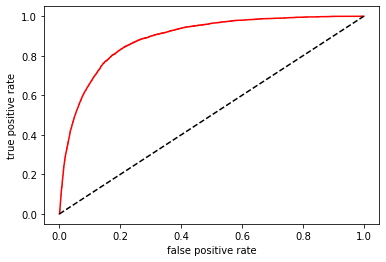

In [68]:
fpr,tpr,thresholds=roc_curve(Y,classifier.predict_proba(X)[:,1])
auc=roc_auc_score(y_test,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [69]:
auc

0.6494676281884731

Dividing train_test data using stratify sampling.

In [84]:
x_train_strat, x_test_strat, y_train_strat, y_test_strat = train_test_split(X,Y,test_size=0.3,random_state=10,shuffle=True,stratify=Y)

In [85]:
print('shape of x_train_strat:',x_train_strat.shape)
print('shape of x_test_strat:',x_test_strat.shape)
print('shape of y_train_strat:',y_train_strat.shape)
print('shape of y_test_strat:',y_test_strat.shape)

shape of x_train_strat: (31647, 37)
shape of x_test_strat: (13564, 37)
shape of y_train_strat: (31647,)
shape of y_test_strat: (13564,)


In [86]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression

#instantiating an object
lr_strat=LogisticRegression()

#model fitting
lr_strat.fit(x_train_strat,y_train_strat)

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
#predicting on test data
strat_pred= lr_strat.predict(x_test_strat)
strat_pred_proba= lr_strat.predict_proba(x_test_strat)

In [88]:
strat_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
strat_pred_proba

array([[0.99263431, 0.00736569],
       [0.81306743, 0.18693257],
       [0.99646435, 0.00353565],
       ...,
       [0.97711808, 0.02288192],
       [0.92755198, 0.07244802],
       [0.93027201, 0.06972799]])

In [90]:
strat_pred.shape

(13564,)

In [91]:
strat_pred_proba.shape

(13564, 2)

In [92]:
df_pred = pd.DataFrame({'Actual':y_test_strat,'predicted':strat_pred})
df_pred.head()

,Actual,predicted
7250,0,0
41418,1,0
8576,0,0
43040,1,1
21186,0,0


In [93]:
df_pred['proba_0']=strat_pred_proba[:,0]
df_pred['proba_1']=strat_pred_proba[:,1]

In [94]:
df_pred

,Actual,predicted,proba_0,proba_1
7250,0,0,0.992634,0.007366
41418,1,0,0.813067,0.186933
8576,0,0,0.996464,0.003536
43040,1,1,0.290220,0.709780
21186,0,0,0.929814,0.070186
...,...,...,...,...
39552,1,0,0.687361,0.312639
35594,1,1,0.206635,0.793365
4712,0,0,0.977118,0.022882
15260,0,0,0.927552,0.072448


In [95]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_strat,strat_pred)

In [96]:
cm

array([[11718,   259],
       [ 1098,   489]], dtype=int64)

In [97]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test_strat,strat_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     11977
           1       0.65      0.31      0.42      1587

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



From the above result,using stratify sampling we did not get any good results.

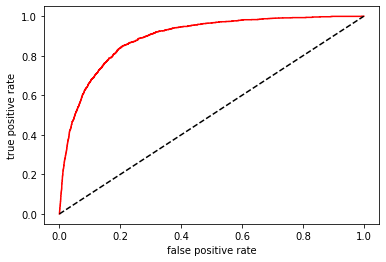

In [100]:
#ROC curve

fpr,tpr,thresholds=roc_curve(y_test_strat,lr_strat.predict_proba(x_test_strat)[:,1])
auc=roc_auc_score(y_test_strat,strat_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [101]:
auc

0.6432518817967583

auc score is same as above.

Using RandomOver sampling

In [106]:
#importing library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [109]:
#define over sampling
oversample = RandomOverSampler(sampling_strategy='minority')

#fit and apply 
X_over,Y_over = oversample.fit_resample(X,Y)

In [111]:
# summarize class distribution
print(Counter(Y_over))

Counter({0: 39922, 1: 39922})


In [114]:
#define train_test data
X_over_train,X_over_test,Y_over_train,Y_over_test = train_test_split(X_over,Y_over,test_size=0.33,random_state=30)

In [115]:
#instatiating an object
lr_oversample = LogisticRegression()

# fitting on train data set
lr_oversample.fit(X_over_train,Y_over_train)

C:\Users\Siddhant Sonawane\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
#predict on test data
os_pred=lr_oversample.predict(X_over_test)
os_pred_proba=lr_oversample.predict_proba(X_over_test)

In [119]:
os_pred.shape

(26349,)

In [120]:
os_pred_proba.shape

(26349, 2)

In [121]:
#making datafram of these prediction
df_os_pred = pd.DataFrame({'acutal':Y_over_test,'predicted':os_pred})
df_os_pred

,acutal,predicted
3043,0,0
60067,1,1
42782,1,1
15530,0,1
59665,1,1
...,...,...
28373,0,0
52647,1,1
6403,0,0
18949,0,0


In [122]:
df_os_pred['proba_0'] = os_pred_proba[:,0]
df_os_pred['proba_1'] = os_pred_proba[:,1]

In [123]:
df_os_pred

,acutal,predicted,proba_0,proba_1
3043,0,0,0.958881,0.041119
60067,1,1,0.288434,0.711566
42782,1,1,0.066544,0.933456
15530,0,1,0.277680,0.722320
59665,1,1,0.243522,0.756478
...,...,...,...,...
28373,0,0,0.744877,0.255123
52647,1,1,0.390731,0.609269
6403,0,0,0.920684,0.079316
18949,0,0,0.650549,0.349451


In [124]:
#confusion matrix
cm_os = confusion_matrix(Y_over_test,os_pred)
cm_os

array([[10991,  2288],
       [ 2588, 10482]], dtype=int64)

In [126]:
#classification report
print(classification_report(Y_over_test,os_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     13279
           1       0.82      0.80      0.81     13070

    accuracy                           0.81     26349
   macro avg       0.82      0.81      0.81     26349
weighted avg       0.82      0.81      0.81     26349



From the above classification report we can see that, Precision has increased after using oversampling.

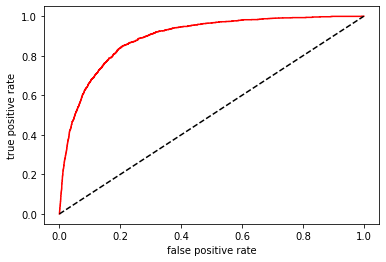

In [127]:
#ROC curve

fpr,tpr,thresholds=roc_curve(y_test_strat,lr_strat.predict_proba(x_test_strat)[:,1])
auc=roc_auc_score(Y_over_test,os_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [128]:
auc

0.8148435786311239

auc score also increased from 64% to 81%,means our model is 81% correctly able to distinguish between classes.